In [1]:
#importing files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np



In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
data=pd.read_csv("50_Startups.csv")

EDA Transformations

In [4]:
data


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.shape

(50, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
#checking null values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
#checking descriptive statistics
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
#Renaming the column names
data1=data.rename({'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'MKS'},axis=1)

In [11]:
data1.head()

,RDS,ADS,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Correlation

In [12]:
data1.corr()

<ipython-input-12-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RDS,ADS,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADS,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


scatter plots

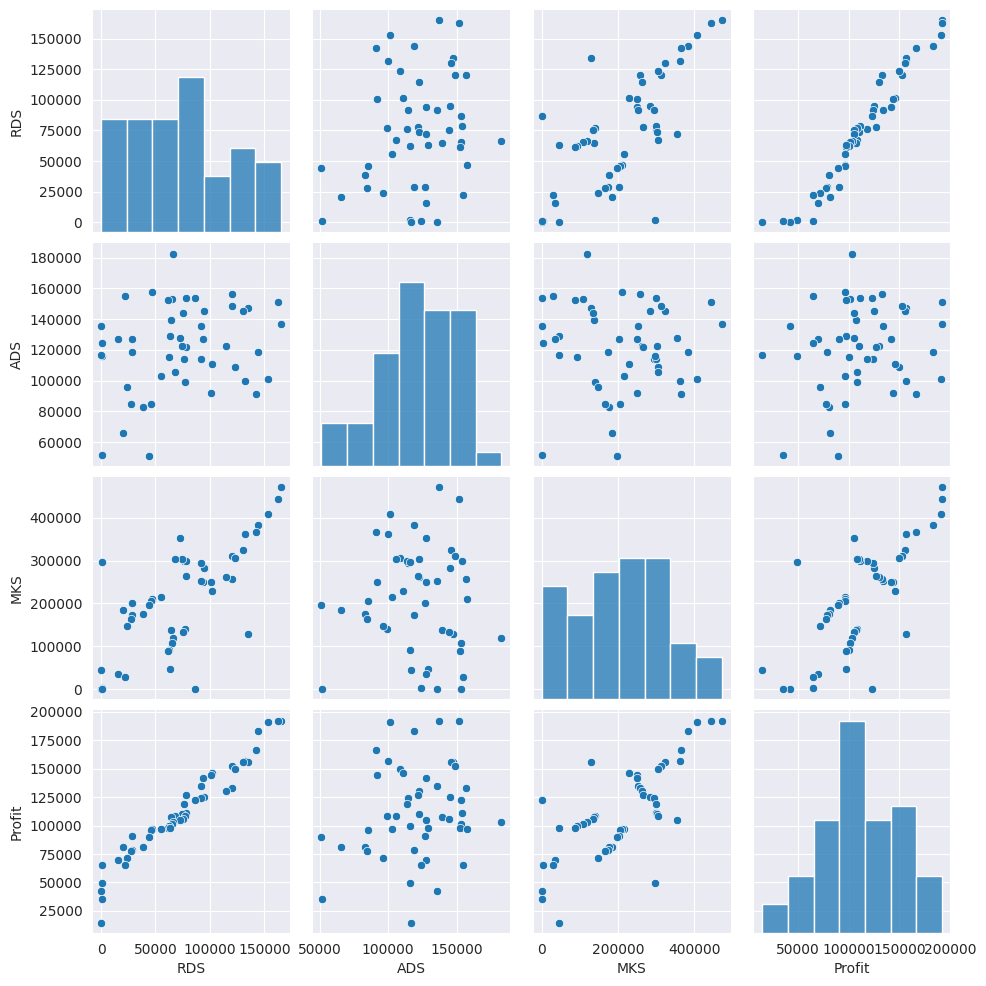

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

Model Building

In [14]:
model=smf.ols('Profit~RDS+ADS+MKS',data=data1).fit()

Testing Model

In [15]:
model.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MKS              0.027228
dtype: float64

In [16]:
#calculating t and p values
print(model.tvalues,'/n',model.pvalues)

Intercept     7.626218
RDS          17.846374
ADS          -0.525507
MKS           1.655077
dtype: float64 /n Intercept    1.057379e-09
RDS          2.634968e-22
ADS          6.017551e-01
MKS          1.047168e-01
dtype: float64


In [17]:
(model.rsquared)

0.9507459940683246

since the p-values of ADS & MKS are >0.05 so we will be building slr & mlr

In [18]:
slr_ads=smf.ols("Profit~ADS",data=data1).fit()

In [19]:
print(slr_ads.tvalues,slr_ads.pvalues)

Intercept    3.040044
ADS          1.419493
dtype: float64 Intercept    0.003824
ADS          0.162217
dtype: float64


ADS has higher value than p. hence we say it has insignificant value

In [20]:
slr_mks=smf.ols("Profit~MKS",data=data1).fit()

In [21]:
slr_mks.pvalues

Intercept    4.294735e-10
MKS          4.381073e-10
dtype: float64

MKS p-value is < 0.05 hence, we say it is significant

In [22]:
# In the above two operations we performed separately now we calculate p-value by combining ADS & MKS i.e, calculating multiple linear regression

In [23]:
mlr_am=smf.ols("Profit~ADS+MKS",data=data1).fit()

In [24]:
print(mlr_am.pvalues,mlr_am.tvalues)

Intercept    2.589341e-01
ADS          1.729198e-02
MKS          9.727245e-11
dtype: float64 Intercept    1.142741
ADS          2.467779
MKS          8.281039
dtype: float64


Model validation can be done in two ways

1. collinearity check     2. Residual Analysis

1.collinearity &

Checking vif values = 1/(1-RSquare) for all independent variables leaving the dependent variable


In [25]:
rsq_r=smf.ols('RDS~ADS+MKS',data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols('ADS~RDS+MKS',data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols('MKS~RDS+ADS',data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

#storing the values of vif in dataframe

d1={'Variables':['RDS','ADS','MKS'],'VIF':[vif_r,vif_a,vif_m]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADS,1.175091
2,MKS,2.326773


From the above table we can clearly say that the variables have no collinearity because no value of vif is >20 .
so we consider all the variables in regression equation

2. Residual Analysis

In residual we have 3 plots

1. Q-Q plot   2. Error - Y plot   3. error- x plot

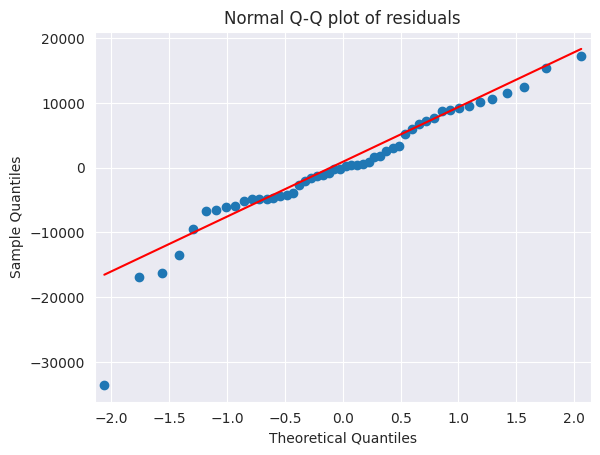

In [26]:
#1.Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
#checking index of outliers
list(np.where(model.resid<-30000))


[array([49])]

In [28]:
#Residual plot for homoscadasticity
def get_standardized_values(vals):return(vals-vals.mean())/vals.std()

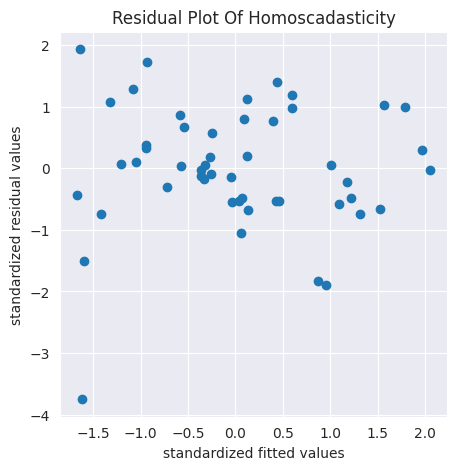

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot Of Homoscadasticity")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

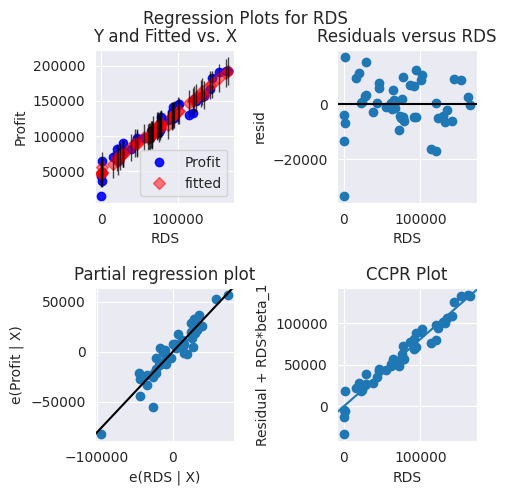

In [30]:
#Residuals vs Regressors plots
#for RDS
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

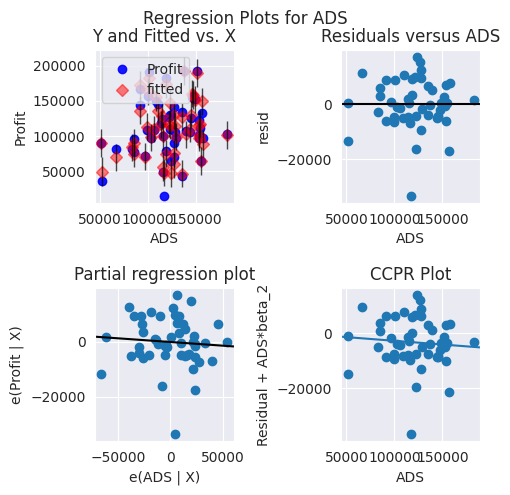

In [31]:
#For ADS
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'ADS',fig=fig)
plt.show()

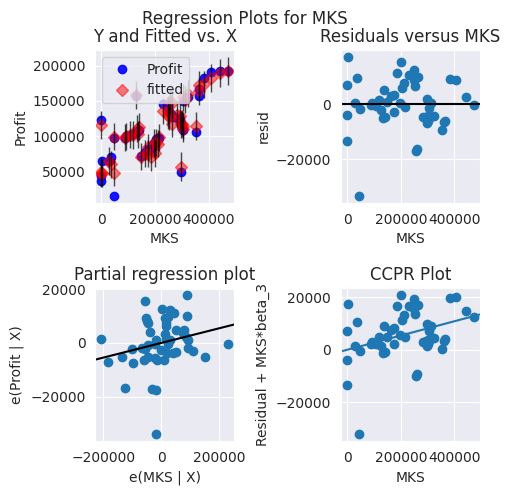

In [32]:
#For MKS
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'MKS',fig=fig)
plt.show()

# Model Deletion Diagnostics


For checking outliers or influencers we use model deletion diagnostics.
In that we have 2 types 1.cook's distance 2.leverage values

In [33]:
#1.cook's distance: In cook's distance always the values are less than 1,if the values are greater than 1 then we say that there is an outlier in the model.
from statsmodels.graphics.regressionplots import influence_plot
model_inflence=model.get_influence()
(c,_)=model_inflence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

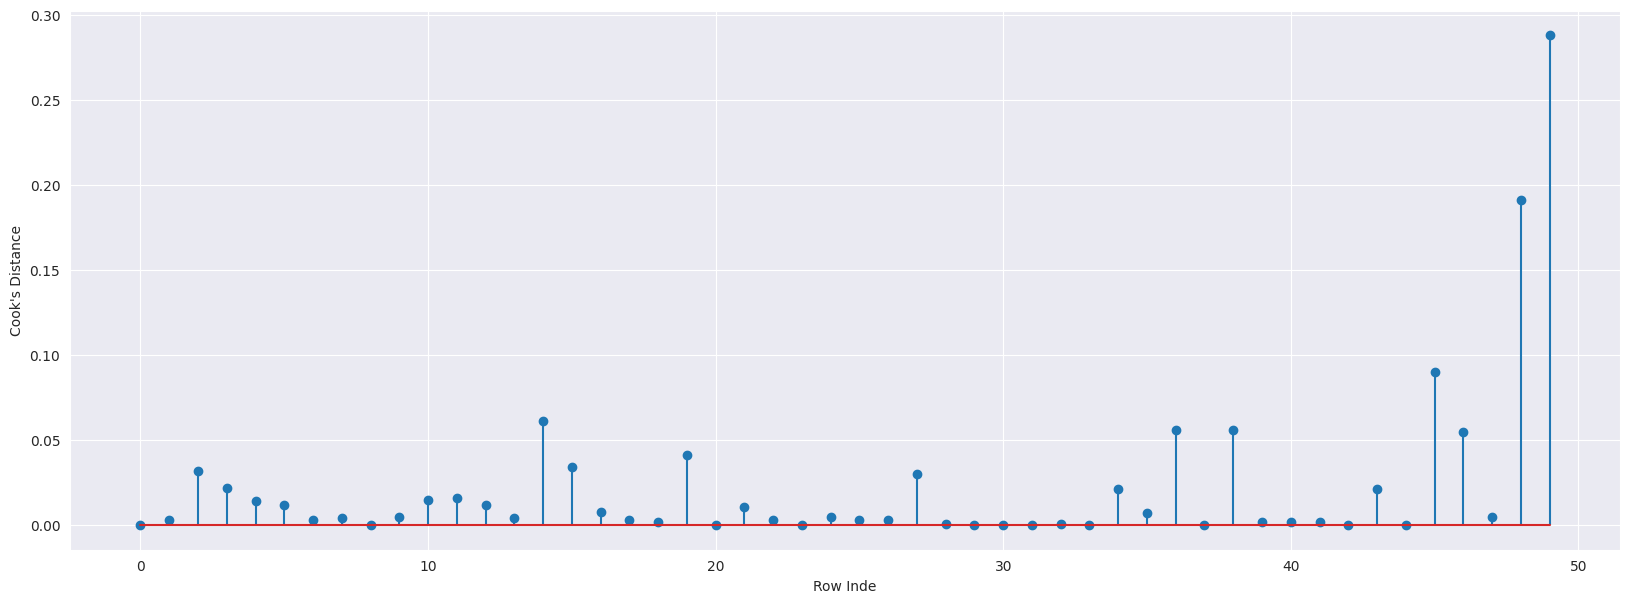

In [34]:
#plot stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel("Row Inde")
plt.ylabel("Cook's Distance")
plt.show()

In [35]:
#checking outlier exact position
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [36]:
#Calculating leverage cutoff
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

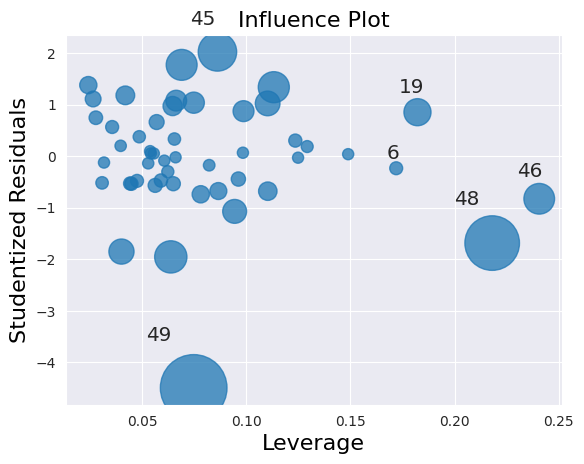

In [37]:
#plotting influence plots for leverage
influence_plot(model)
plt.show()

From the above graph it is clear that 49 is the outlier.

In [38]:
#To display row of the outlier
data1[data1.index.isin([49])]

,RDS,ADS,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [39]:
data1.iloc[[49]]

,RDS,ADS,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving Model

In [40]:
#Removing the influencer points which are above the leverage cutoff and resetting the index.
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADS,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
data2.head()

,RDS,ADS,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [61]:
model=smf.ols('Profit~RDS+ADS+MKS',data=data2).fit()
model.rsquared,model.aic

(0.9613162435129847, 1020.5652974526367)

In [62]:
model1=smf.ols("Profit~RDS+ADS+MKS",data=data2).fit()

(c,_)=model1.get_influence().cooks_distance

# Model Predictions

In [63]:
new_data=pd.DataFrame({'RDS':6000,'ADS':8000,'MKS':10000},index=[1])
model.predict(new_data)

1    57155.175797
dtype: float64

In [64]:
pred_y=model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [65]:
d2={'prep_nodels':['model1','model'],'Rsquared':[model1.rsquared,model.rsquared]}
table=pd.DataFrame(d2)
table

,prep_nodels,Rsquared
0,model1,0.961316
1,model,0.961316
